# Market Segmentation

### This case requires developing a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups.

## Dataset
The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

| **Feature**    | **Description** |
| :-------- | :------- |
| **cust_id**| Identification of Credit Card holder<br>(Categorical)    |
| **balance**| Balance amount left in their account to make purchases     |
| **balance_frequency**    | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)    |
| **purchases**    | Amount of purchases made from account |
| **oneoff_purchases**    | Maximum purchase amount done in one-go    |
| **installments_purchases**    | Amount of purchase done in installment    |
| **cash_advance**    | Cash in advance given by the user    |
| **purchases_frequency**    | How frequently the Purchases are being made, score between 0 and 1(1 = frequently purchased, 0 = not frequently purchased)   |
| **oneoff_purchases_frequency**    | How frequently Purchases are happening in one-go(1 = frequently purchased, 0 = not frequently purchased)    |
| **purchases_installments_frequency**    | How frequently purchases in installments are being done(1 = frequently done, 0 = not frequently done)    |
| **cash_advance_frequency**    | How frequently the cash in advance being paid    |
| **cash_advance_trx**    | umber of Transactions made with "Cash in Advanced"(discrete(intiger))   |
| **purchases_trx**    | Numbe of purchase transactions made<br>(discrete(intiger))   |
| **credit_limit**    | Limit of Credit Card for user  |
| **payments**   | Amount of Payment done by user    |
| **minimum_payments**    | Minimum amount of payments made by user   |
| **prc_full_payment**    | Percent of full payment paid by user  |
| **tenure**    | Tenure of credit card service for user(discrete(integer)) | 

## **Objective :**
#### **This case requires developing a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups**.

In [389]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [390]:
#load the data
customers = pd.read_csv('CC GENERAL.csv')

In [391]:
#view the first five rows of the data
customers.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [392]:
customers.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [393]:
#check columns information
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [394]:
customers.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [395]:
# drop irrelevant columns
customers = customers.drop(columns=['CUST_ID'],axis=1)

In [396]:
#check columns information
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


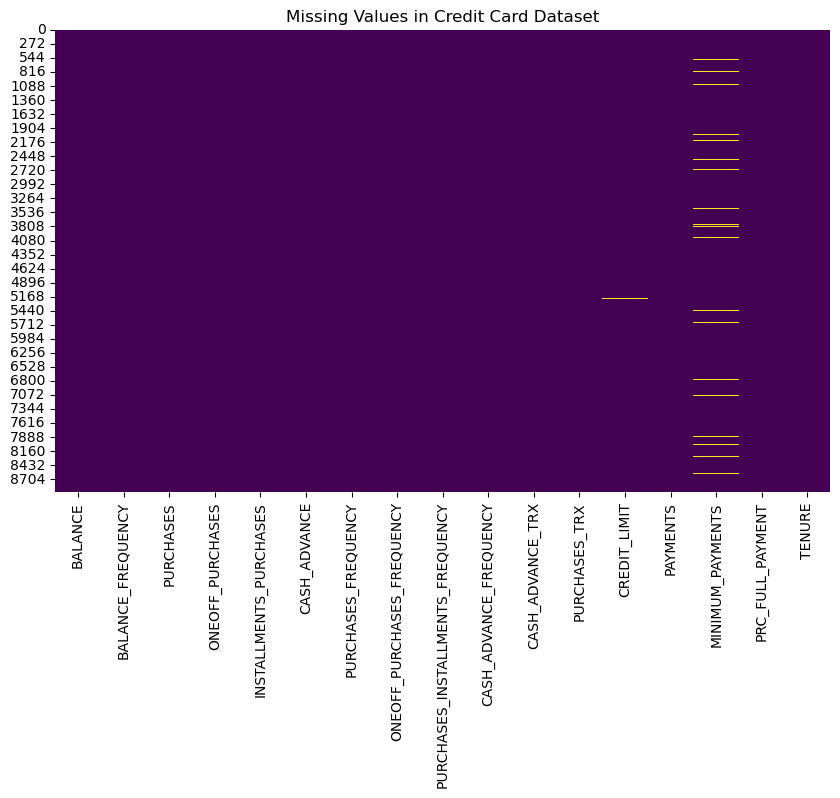

In [397]:
import seaborn as sns
# Check for missing values
missing_values = customers.isnull().sum()
print(missing_values)
plt.figure(figsize=(10, 6))
sns.heatmap(customers.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Credit Card Dataset')
plt.show()

### **Data Cleaning**(Missing Data and Outliers)
Handle missing values by imputing or dropping them as appropriate.

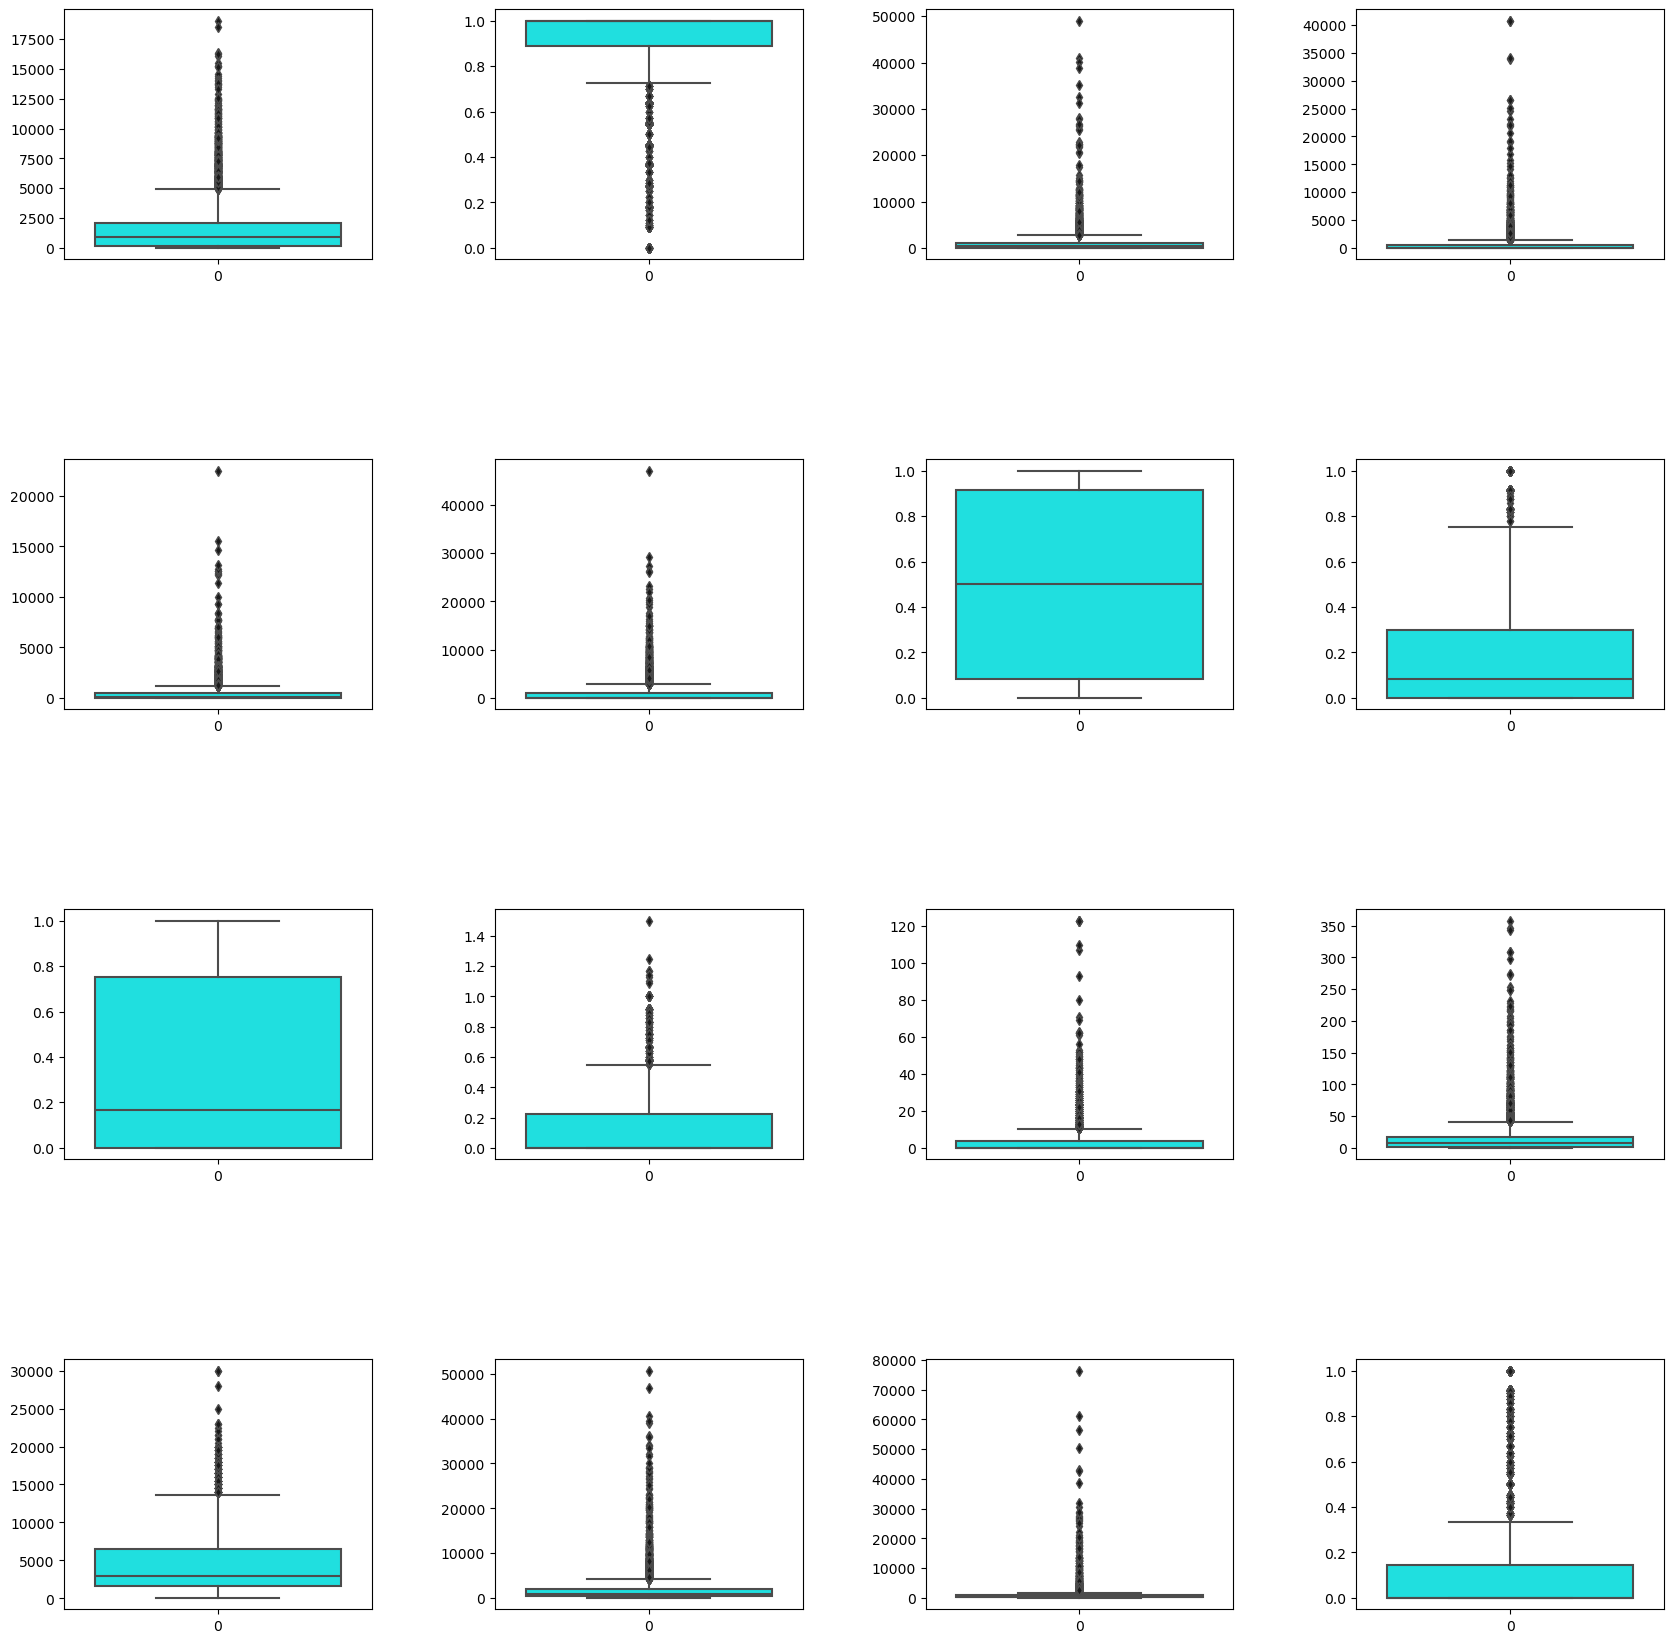

In [398]:
#Using Box plot 

plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range (len(customers.columns)-1):
    
    plt.subplot(4,4,i+1)
    sns.boxplot(customers[customers.columns[i]], color='aqua',flierprops = dict(markerfacecolor = '0.10', markersize = 5))
   

In [399]:
#finding outliers base on the Inter Quantile Range(IQR)
Q1 = customers.quantile(0.25)
Q3 = customers.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

outliers = (customers < (Q1 - 1.5 * IQR)) | (customers > (Q3 + 1.5 * IQR).count())

# Count the number of outliers for each column
outlier_count = outliers.sum()

print(outlier_count)

BALANCE                             8239
BALANCE_FREQUENCY                   1493
PURCHASES                           6855
ONEOFF_PURCHASES                    4597
INSTALLMENTS_PURCHASES              5001
CASH_ADVANCE                        4321
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                     319
PURCHASES_TRX                       2190
CREDIT_LIMIT                        8949
PAYMENTS                            8698
MINIMUM_PAYMENTS                    8569
PRC_FULL_PAYMENT                       0
TENURE                              1366
dtype: int64


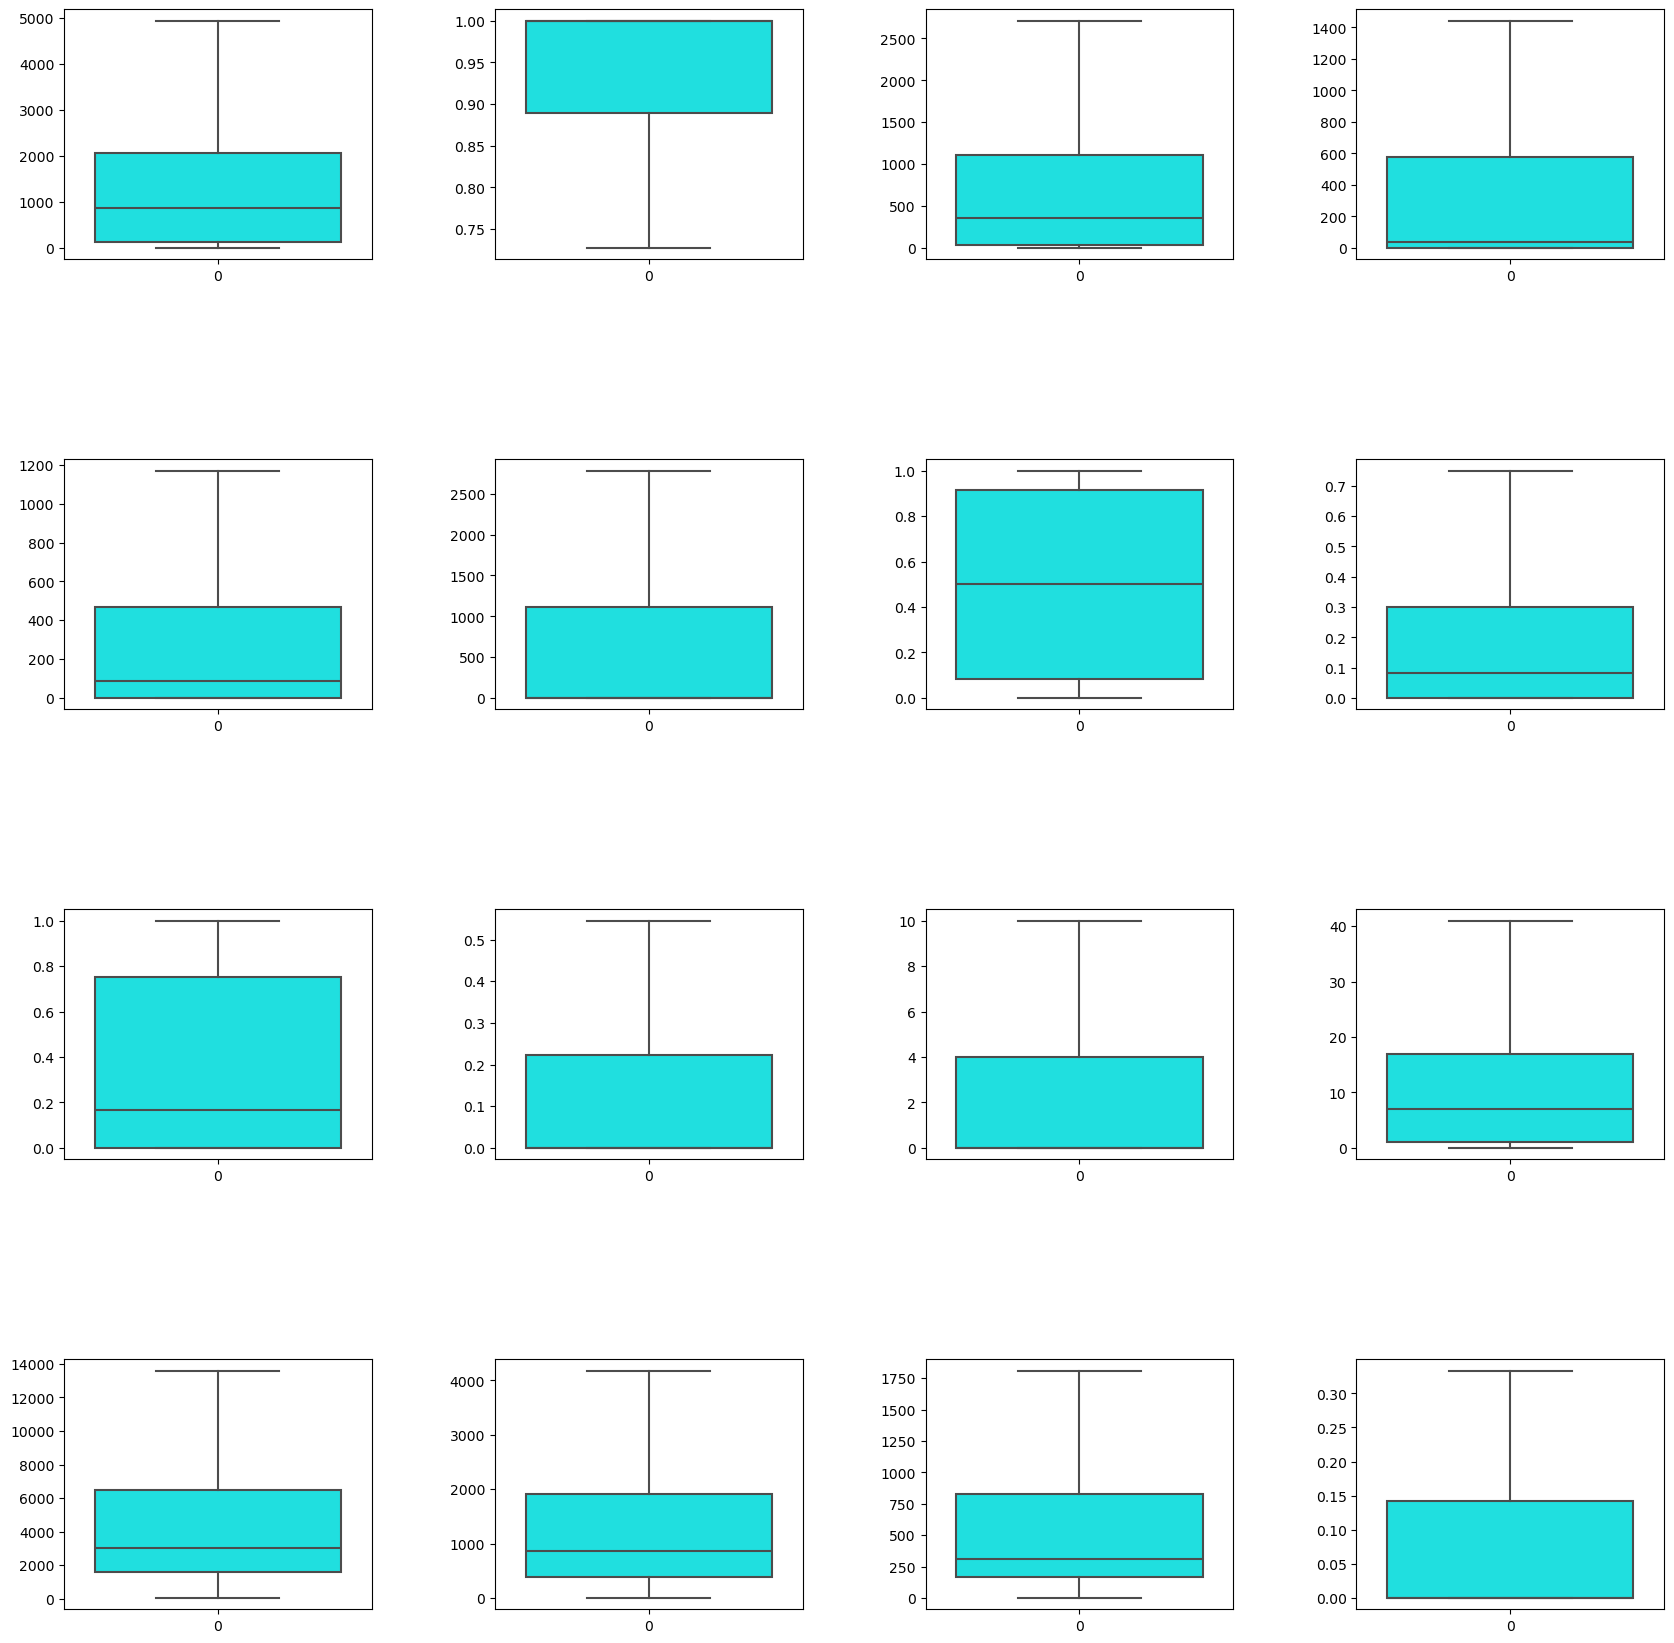

In [400]:
plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range (len(customers.columns)-1):
    plt.subplot(4,4,i+1)
    sns.boxplot(customers[customers.columns[i]],showfliers = False ,color='aqua')

In [426]:
#Removing Outliers
from scipy import stats
customers_cleaned = customers[(np.abs(stats.zscore(customers)) < 3).all(axis=1)]
customers_cleaned

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8875,121.294493,0.750000,385.26,385.26,0.00,169.554775,0.500000,0.500000,0.000000,0.125000,3,7,500.0,98.225317,113.944625,0.000000,8,1
8876,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000000,0,7,1000.0,62.619008,109.580539,0.000000,8,1
8877,869.328293,0.750000,0.00,0.00,0.00,1153.925205,0.000000,0.000000,0.000000,0.125000,3,0,1200.0,150.755024,337.986933,0.000000,8,1
8878,137.744895,1.000000,441.00,0.00,441.00,0.000000,0.750000,0.000000,0.625000,0.000000,0,6,1000.0,169.249683,124.639905,0.000000,8,1


In [402]:
# MINIMUM_PAYMENTS has so much missing value so it is reasonable to find a solution for fill them
customers[['PAYMENTS', 'MINIMUM_PAYMENTS']][customers['MINIMUM_PAYMENTS'].isna()]


,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8919,0.000000,NaN
8929,0.000000,NaN
8935,0.000000,NaN
8944,0.000000,NaN


Obviously, the value of zero should be used for MINIMUM_PAYMENTS cells Who they have not done any payments 

In [403]:
# Fill missing values in 'MINIMUM_PAYMENTS' with zero(0)
customers['MINIMUM_PAYMENTS'].fillna((0), inplace=True)
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [404]:
#checking duplicates
customers[customers.duplicated]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [405]:
# missing values in 'CREDIT_LIMIT' column(this column has one missing value)
nulls_value = pd.isnull(customers["CREDIT_LIMIT"])
customers[nulls_value]


# # Dropping row with missing CREDIT_LIMIT value
customers.drop([5203], axis=0, inplace=True)
customers.reset_index( inplace = True)
customers.drop('index',axis=1,inplace = True)

# Verify that there are no more missing values
print(customers.isnull().sum())


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [406]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

In [407]:
# There are a number of rows where PAYMENTS's values are less than MINIMUM_PAYMENTS

print('Shape:', customers[['PAYMENTS', 'MINIMUM_PAYMENTS']][(customers['MINIMUM_PAYMENTS'].notna()) & 
      (customers['PAYMENTS'] < customers['MINIMUM_PAYMENTS'])].shape)
customers[['PAYMENTS', 'MINIMUM_PAYMENTS']][(customers['MINIMUM_PAYMENTS'].notna()) & (customers['PAYMENTS'] < customers['MINIMUM_PAYMENTS'])]

Shape: (2364, 2)


,PAYMENTS,MINIMUM_PAYMENTS
2,622.066742,627.284787
5,1400.057770,2407.246035
10,1083.301007,2172.697765
14,805.647974,989.962866
15,1993.439277,2109.906490
...,...,...
8932,106.138603,337.294767
8938,72.530037,110.950798
8946,81.270775,82.418369
8947,52.549959,55.755628


##### If MINIMUIM_PAYMENTS has the value of PAYMENTS and is equal to zero, we consider the zero for it <br>
##### If PAYMENTS is a value between 0 and PAYMENTS_MEAN, we use PAYMENTS Otherwise, we use PAYMENTS_MEAN<br>
##### This method is correct because there are 2358 rows in the data set where PAYMENTS is less than MINIMUM_PAYMENTS, so the data itself has given us this permission. 


In [408]:
minpay = customers['MINIMUM_PAYMENTS'].copy() # make a copy of MINIMUM_PAYMENTS
payments_mean = np.mean(customers['PAYMENTS']) # take the mean value of PAYMENTS

i = 0
for payments, minpayments in zip(customers['PAYMENTS'], customers['MINIMUM_PAYMENTS'].isna()):
    if (payments == 0) and (minpayments == True):
        minpay[i] = 0
    elif (0 < payments < payments_mean) and (minpayments == True): 
        minpay[i] = payments
    elif minpayments == True: 

        minpay[i] = payments_mean
    i += 1
    
print(f'Missing (before): {customers.isna().sum().sum()}')
print(f'Missing (after): {minpay.isna().sum().sum()}')

customers['MINIMUM_PAYMENTS'] = minpay.copy()

Missing (before): 0
Missing (after): 0


In [409]:
print (customers['MINIMUM_PAYMENTS'])

0        139.509787
1       1072.340217
2        627.284787
3          0.000000
4        244.791237
           ...     
8944      48.886365
8945       0.000000
8946      82.418369
8947      55.755628
8948      88.288956
Name: MINIMUM_PAYMENTS, Length: 8949, dtype: float64


### Data Visuallization

<Axes: >

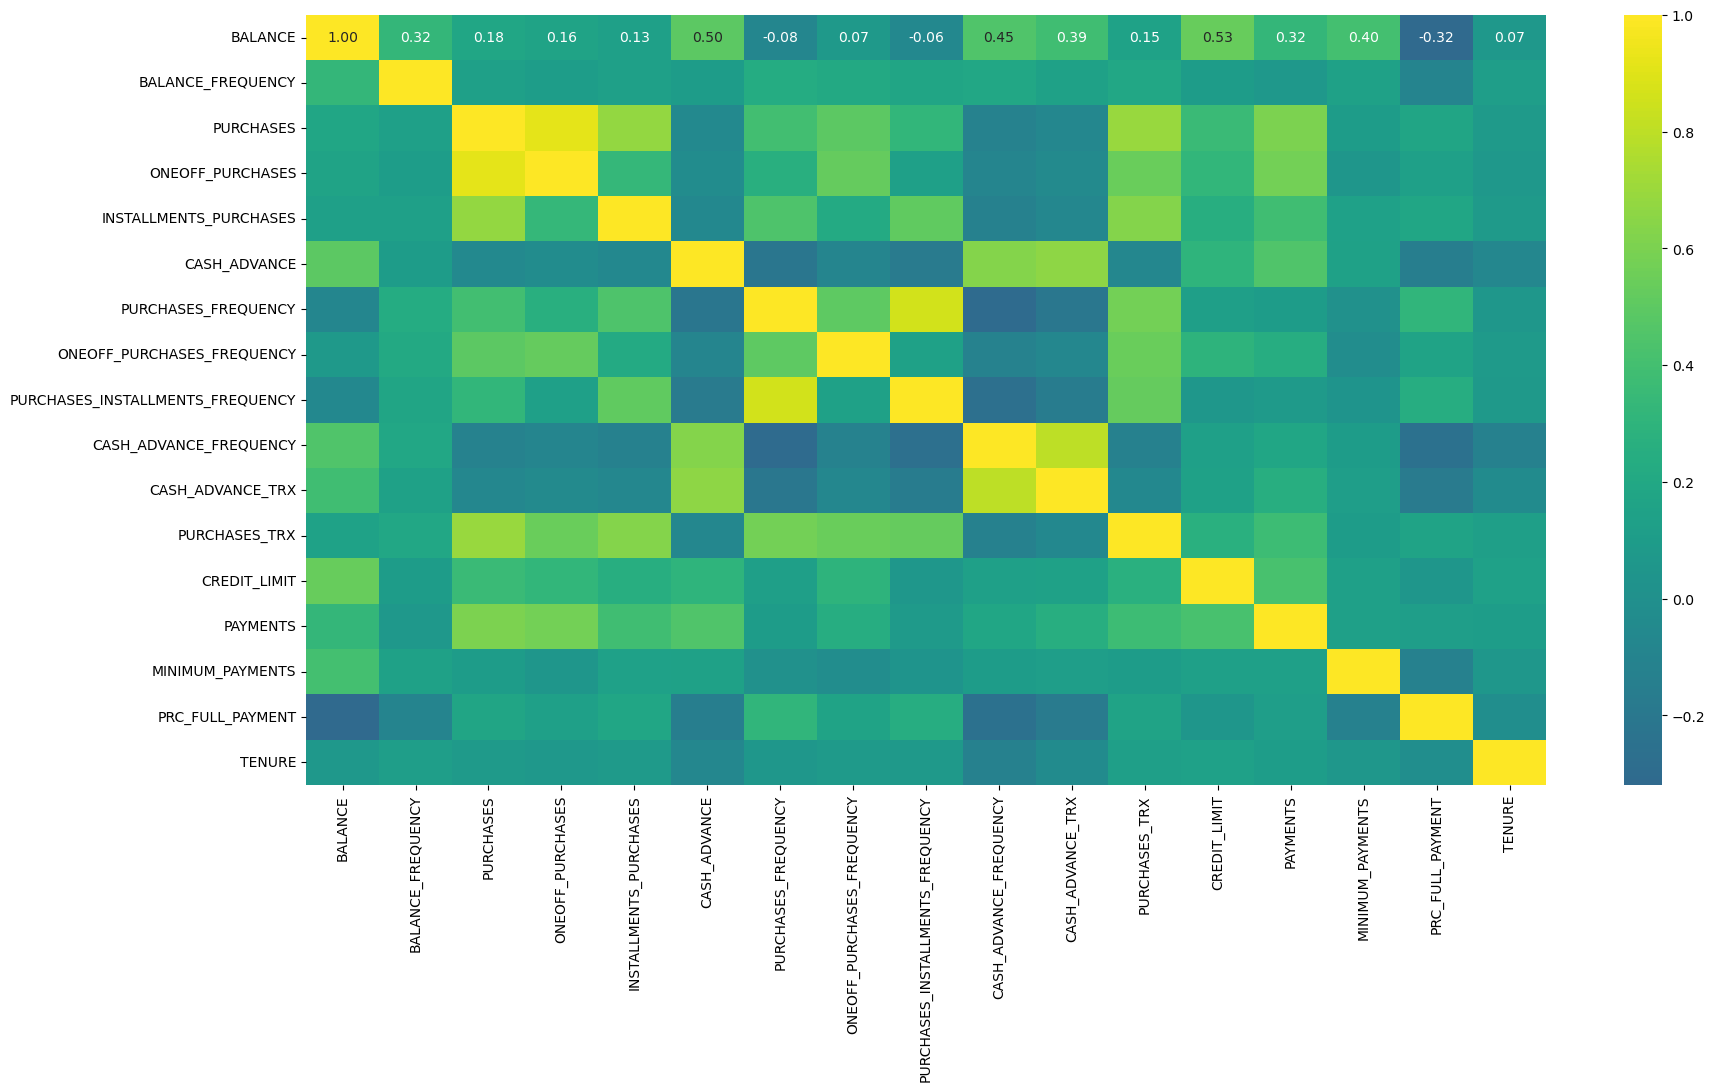

In [411]:
#correlation matrix
corrmat=customers.corr()
plt.figure(figsize=(20,10))  
sns.heatmap(corrmat, annot=True, fmt='.2f', center=0, cmap='viridis')


## Normalizing

In [412]:
customers_model=customers.copy()

scaler= StandardScaler()
customer_Standardize=pd.DataFrame(scaler.fit_transform(customers_model), columns = customers_model.columns)
customer_Standardize

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297334,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088524,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357057,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.336129,1.183844,-4.126919
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.357057,-0.525588,-4.126919
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.321774,0.329128,-4.126919
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.333188,0.329128,-4.126919


## Modelling

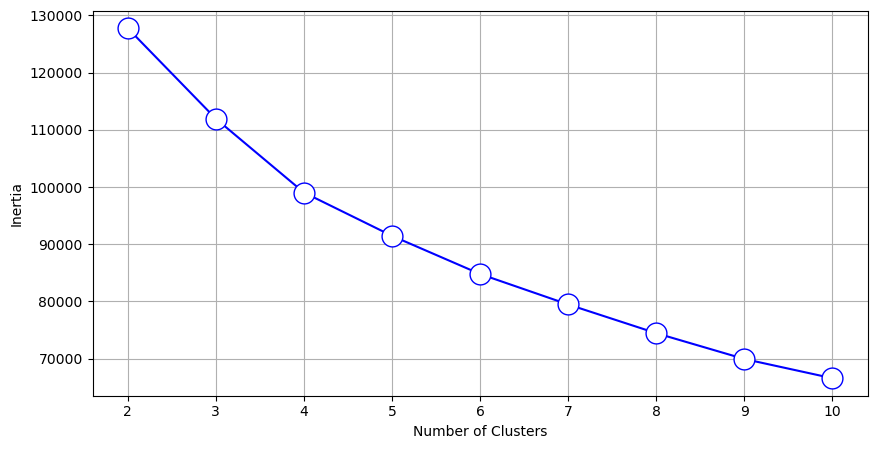

In [413]:
# Kmeans algorithm settings
kmeans_set = {"init":"random", "n_init":10, "max_iter":300, "random_state":42}
# Find inertia for k cluster
inertias = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(customer_Standardize)
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(facecolor="white",figsize = (10 ,5))

plt.plot(np.arange(2 , 11) , inertias  , alpha = 1,  color='b', marker='.', markersize=30, markerfacecolor='white')
plt.xlabel('Number of Clusters') 
plt.ylabel('Inertia')
plt. grid(True)


In [414]:
#Finding the Silhouette Score
silhouette = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(customer_Standardize)
    S_score = silhouette_score(customer_Standardize, kmeans.labels_)
    silhouette.append(S_score)

#Finding the Calinski_Harabasz score
calinski_harabasz = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(customer_Standardize)
    C_score = calinski_harabasz_score(customer_Standardize, kmeans.labels_)
    calinski_harabasz.append(C_score)

#Finding Davies_Bouldin score
davies_bouldin = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(customer_Standardize)
    D_score = davies_bouldin_score(customer_Standardize, kmeans.labels_)
    davies_bouldin.append(D_score)

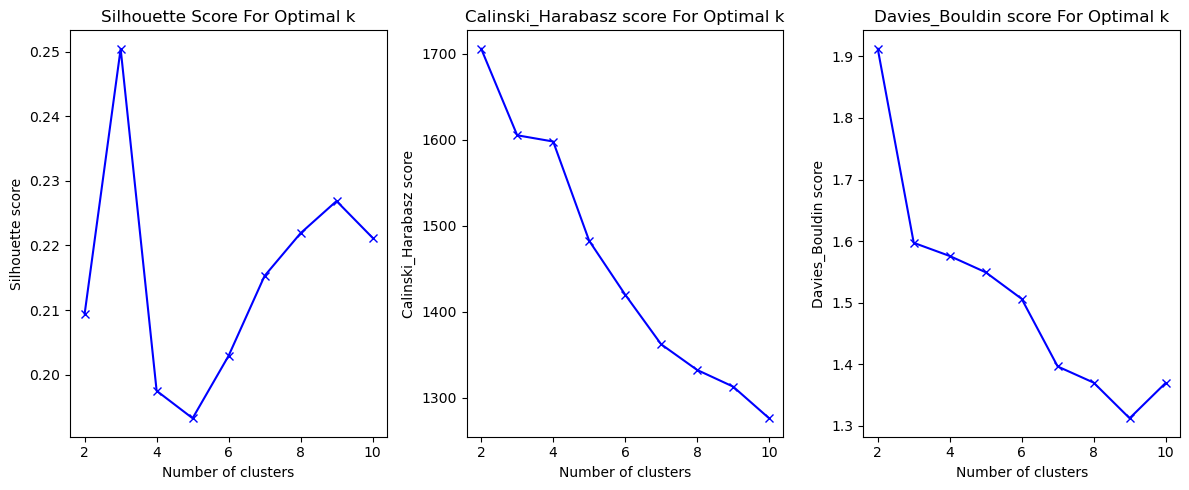

In [415]:
K = range(2, 11)
# Plot the Silhouette score
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(K, silhouette, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score For Optimal k')


# Plot the Calinski_Harabasz score
plt.subplot(1, 3, 2)
plt.plot(K, calinski_harabasz, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski_Harabasz score')
plt.title('Calinski_Harabasz score For Optimal k')


# Plot the Davies_Bouldin score
plt.subplot(1, 3, 3)
plt.plot(K, davies_bouldin, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Davies_Bouldin score')
plt.title('Davies_Bouldin score For Optimal k')

plt.tight_layout()
plt.show()

## The best optimal_k is 3

In [416]:
#assign optimal cluster to kmeans algoritm
Kmean_pred = KMeans(n_clusters=3, **kmeans_set )
Kmean_pred.fit(customer_Standardize)
labels = Kmean_pred.labels_

#normalize centroids
centroids = pd.DataFrame(data=Kmean_pred.cluster_centers_ , columns = [customer_Standardize.columns])

#real centroids
r_centers = scaler.inverse_transform(centroids)
real_centroids = pd.DataFrame(data = r_centers, columns = [customers.columns])
real_centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2197.296209,0.981438,4233.043267,2697.663874,1535.858626,455.603491,0.948701,0.669259,0.739333,0.062830,1.523163,56.112620,7687.659744,4118.077849,1208.456188,0.301078,11.916933
1,800.195517,0.834683,502.180541,250.346708,252.155471,331.939613,0.463577,0.130595,0.344889,0.068346,1.213010,8.588727,3268.535734,907.595712,508.773533,0.154824,11.479764
2,3994.619329,0.958954,385.260508,249.042246,136.295847,3867.293961,0.233157,0.111082,0.145051,0.447676,12.400251,5.635508,6680.053040,3021.793187,1785.511584,0.033817,11.350690


# **Analysis Section**
## Visualizing results

In [417]:
# Add cluster labels to the original data
customers['cluster']=labels
customers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8945,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6,1
8946,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8947,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [418]:
customers_count = customers.groupby(by=["cluster"]).size().reset_index(name="counts")
customers_count

,cluster,counts
0,0,1252
1,1,6105
2,2,1592


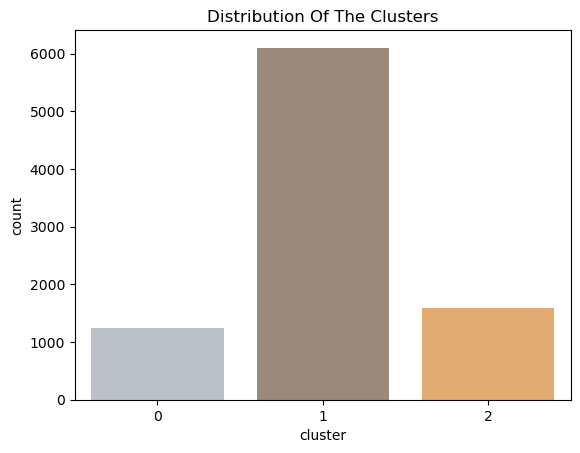

In [419]:
#Plotting countplot of clusters
pal = ["#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=customers['cluster'], palette= pal)
pl.set_title("Distribution Of The Clusters")

plt.show()

In [420]:
col_names=['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

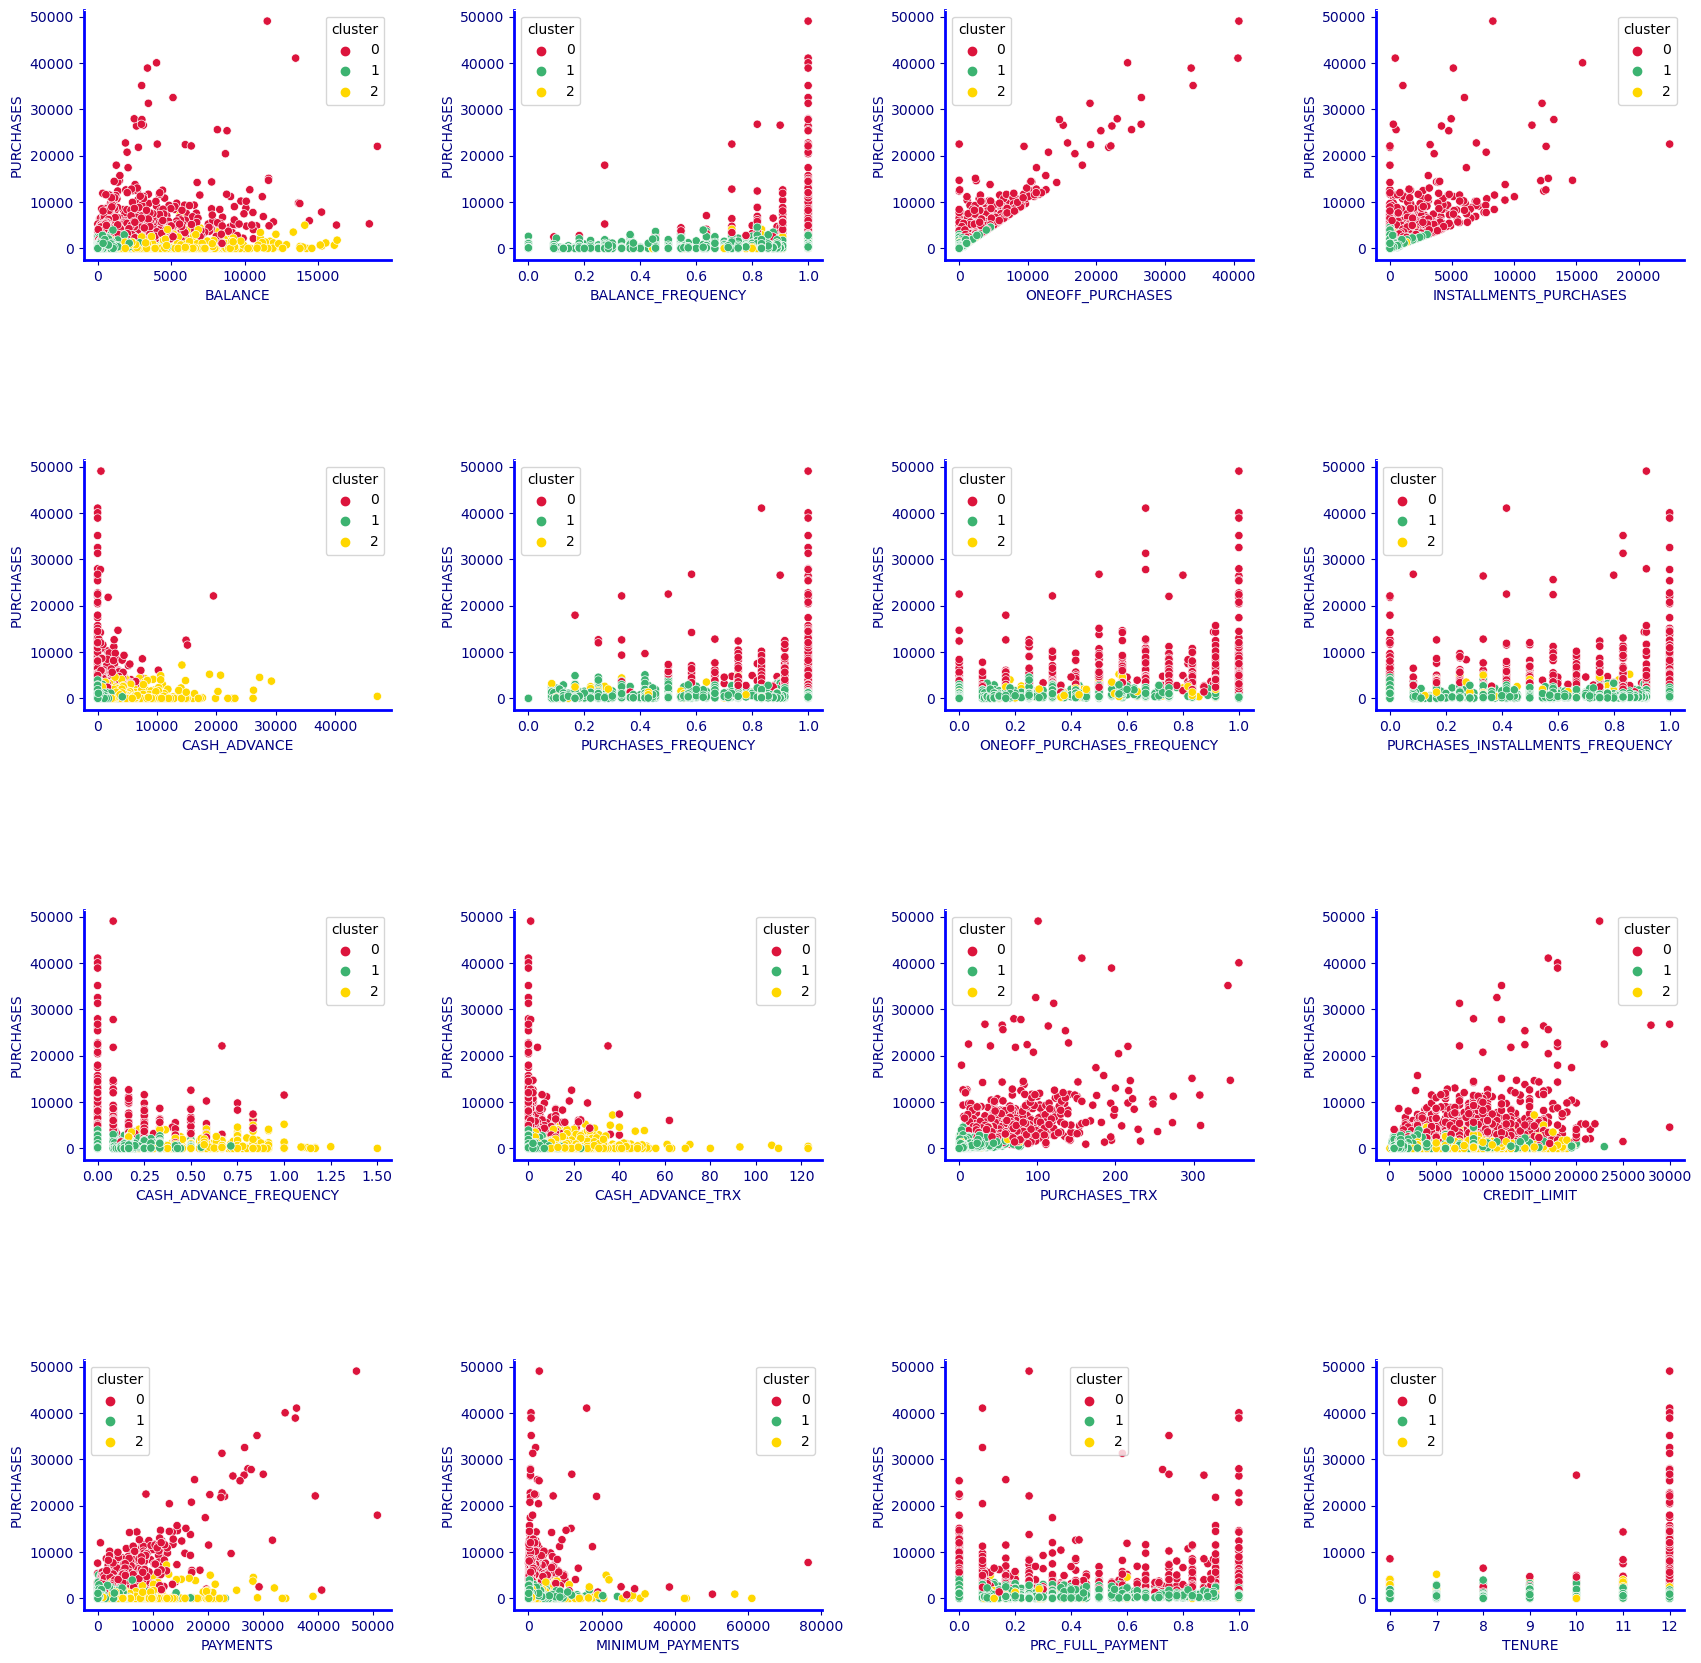

In [421]:
plt.subplots(nrows=4 , ncols=4 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
palette1=["crimson","MediumSeaGreen","gold"]
j=0 
for i in col_names:
     
    plt.subplot(4,4,j+1)
    ax = sns.scatterplot(x=i , y  ='PURCHASES', hue='cluster', data=customers, palette=palette1)
    j=j+1
    ax.spines['bottom'].set_color('blue')
    ax.spines['top'].set_color('white') 
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_color('blue')
    ax.xaxis.label.set_color('navy')
    ax.yaxis.label.set_color('navy')
    ax.tick_params(colors="navy", which='both')  # 'both' refers to minor and major axes


In [422]:
# Assign the clusters to analyze what features are being assigned to what clusters to label them
customers['cluster']=labels
cluster_profiles = customers.groupby('cluster').mean()
print(cluster_profiles)

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                  
0        2197.296209           0.981438  4233.043267       2697.663874   
1         800.495258           0.834683   502.016026        250.264695   
2        3997.482982           0.959112   385.744504        249.355113   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                   1535.858626    455.603491             0.948701   
1                    252.072865    332.846674             0.463425   
2                    136.467073   3868.256964             0.233450   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.669259                          0.739333   
1                          0.130552                        

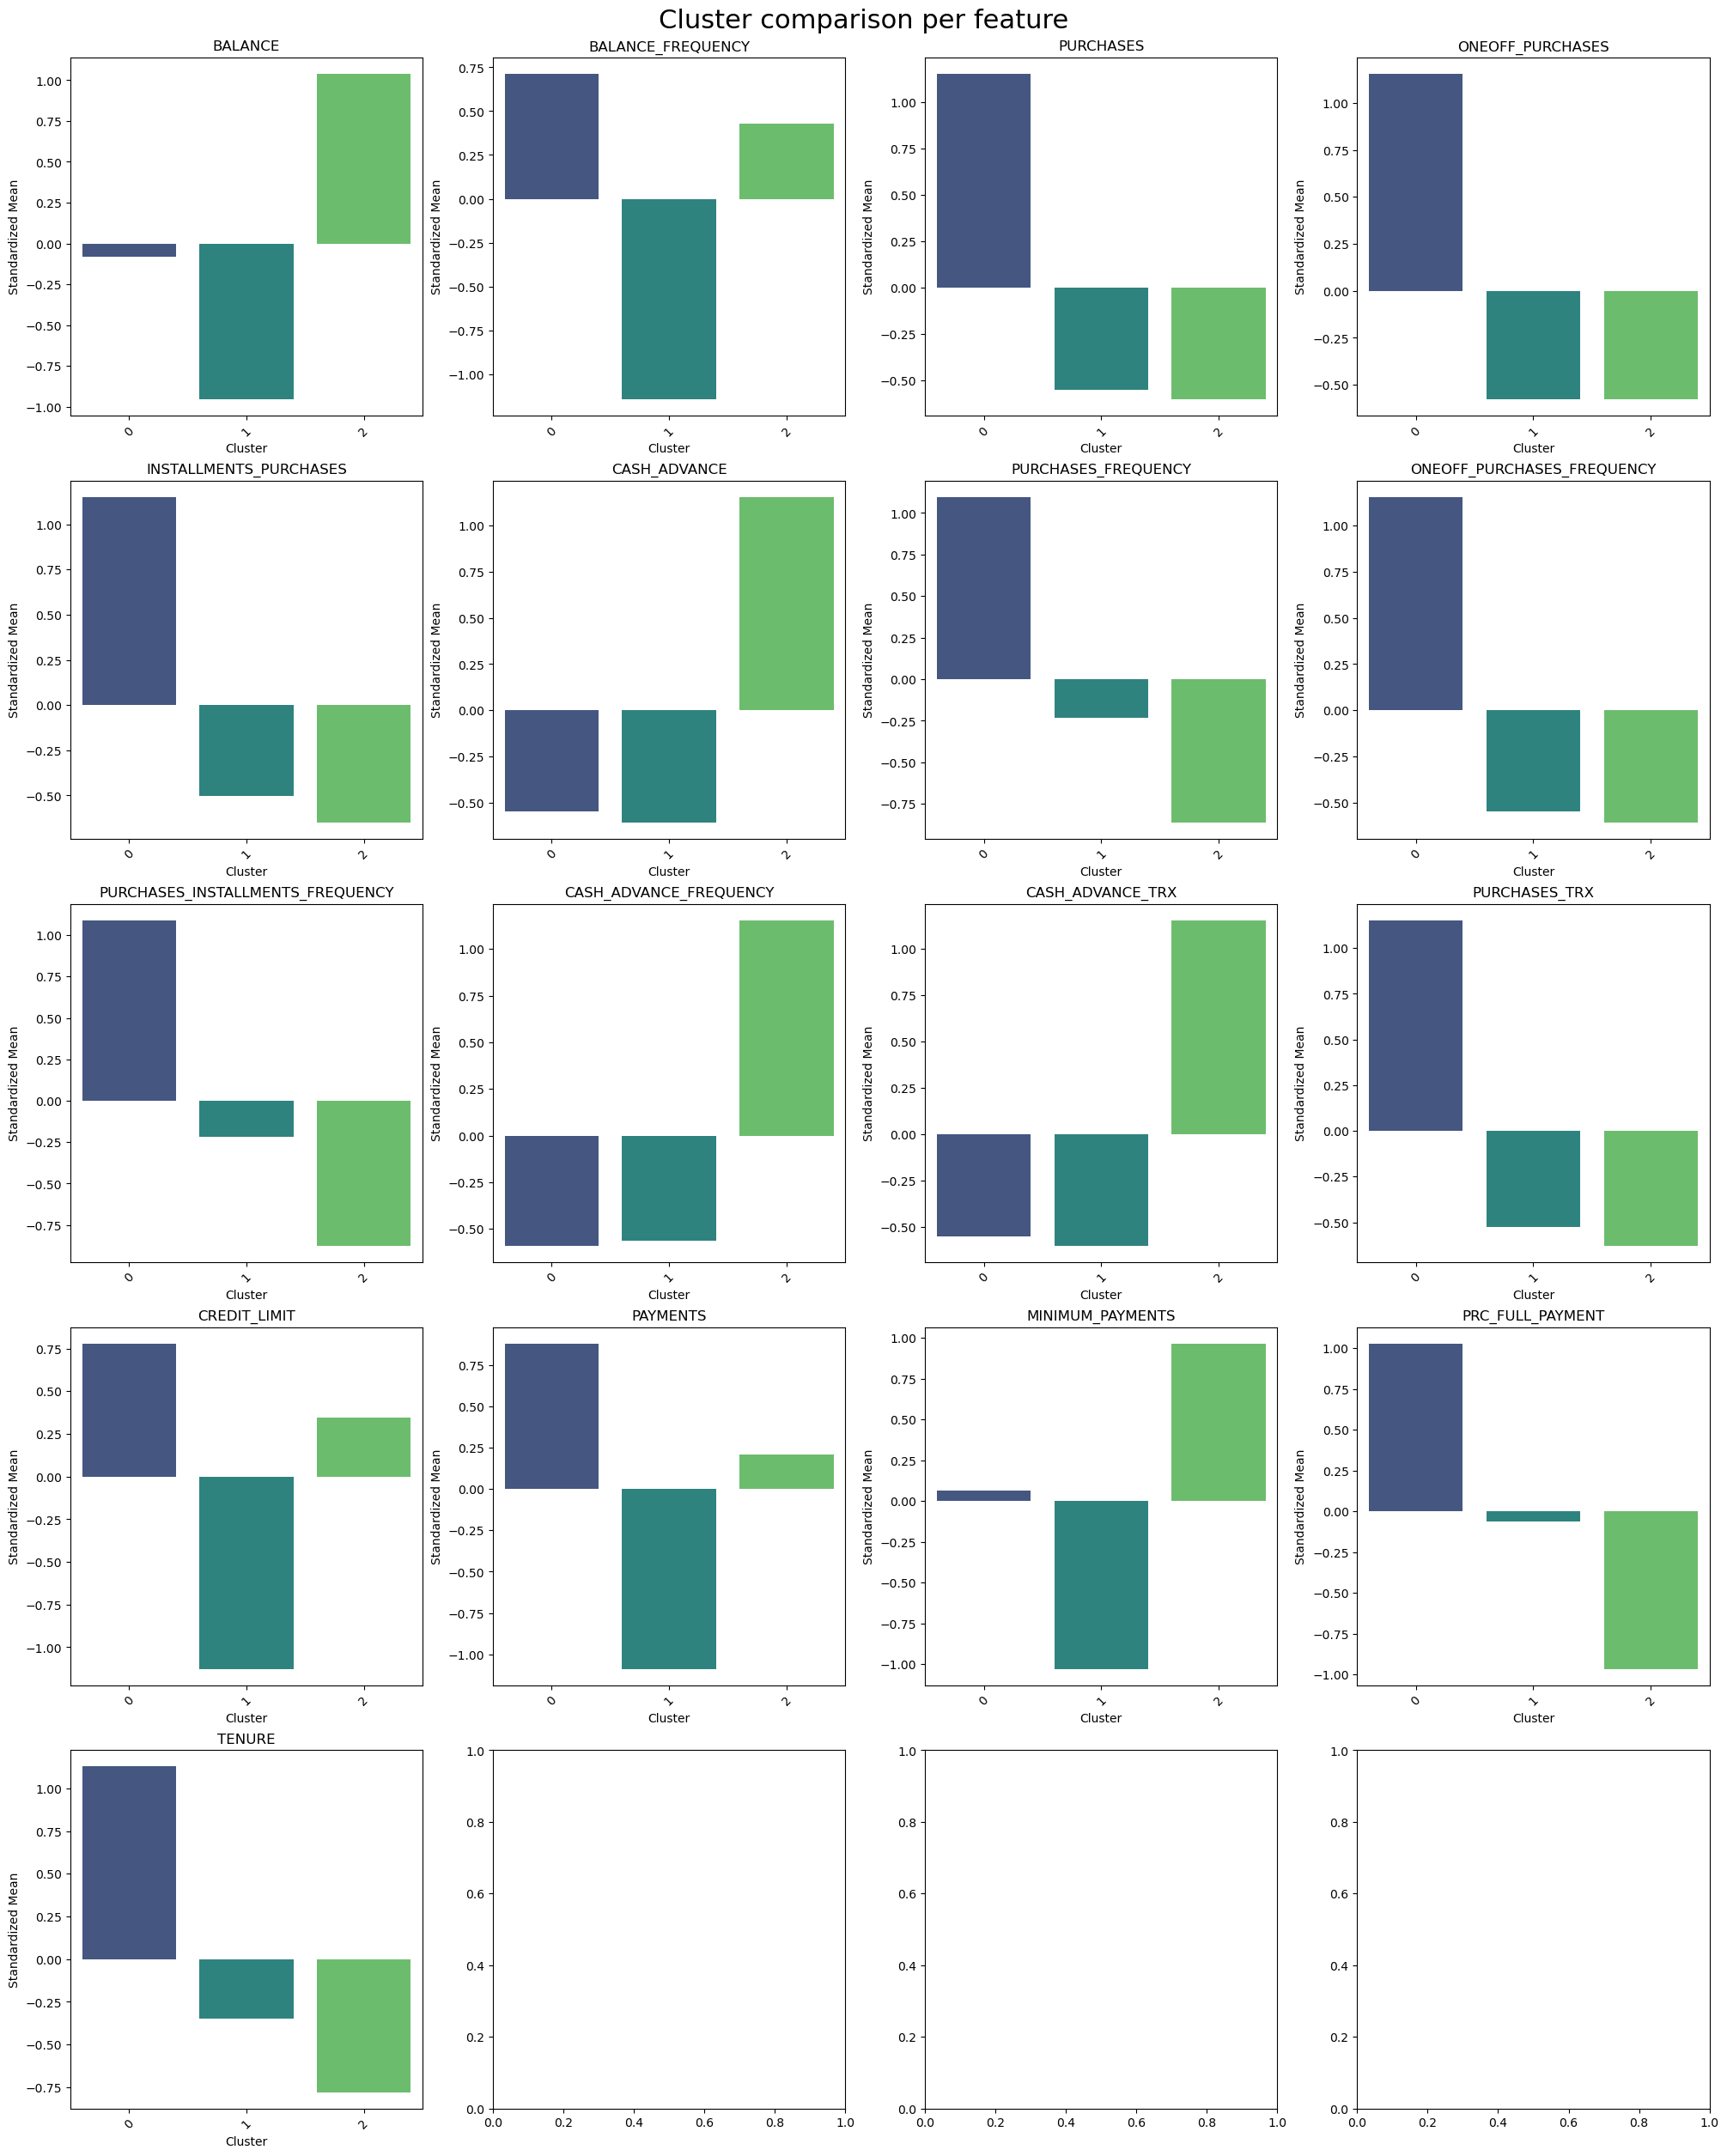

In [423]:
# Plot all features to see the differences
z_cluster_profiles = (cluster_profiles - cluster_profiles.mean()) / cluster_profiles.std()
num_rows = (len(z_cluster_profiles.columns) // 4) + 1
num_cols = min(len(z_cluster_profiles.columns), 4)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows), constrained_layout=True)
fig.suptitle('Cluster comparison per feature', fontsize=22)

for i, feature in enumerate(z_cluster_profiles.columns):
    row = i // num_cols
    col = i % num_cols
    if len(z_cluster_profiles.columns) > 4:
        ax = axes[row, col]
    else:
        ax = axes[i] if len(z_cluster_profiles.columns) > 1 else axes
    
    sns.barplot(x=z_cluster_profiles.index, y=z_cluster_profiles[feature], ax=ax, palette='viridis')
    ax.set_title(feature)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Standardized Mean')
    ax.tick_params(axis='x', rotation=45)

plt.show()

### **Interpreting Cluster Characteristics**

#### Cluster 0:
**Characteristics:**
* High purchases
* High installment purchases
* High purchase frequency
* High one off purchase frequency
* High purchase installments frequency
* High purchases transactions
* High credit limit
* High payments
* High full payments
* High tenure

- Cluster 0 comprises individuals who make frequent purchases and usually settle their amount in full. It seems to be the exact opposite of cluster 2.
As a result, their credit limit is bigger and their credit duration is longer.


#### Cluster 1:
**Characteristics:**
* Low balance
* Low balance frequency
* Low credit limit
* Low payments
* Low minimum payments

- Seems that Cluster 1 lies between these two groups. They are almost average on most traits, however they frequently exhibit low balance, 
which indicates that their balance is typically lower and less variable. These are typically those who pay little or nothing at all, meaning 
that they donot really use their credit card that much overall.



#### Cluster 2:
**Characteristics:**
* Very high balance
* High cash advance
* Low purchase frequency
* Low purchase installments frequency
* High cash advance frequency
* High cash advance transaction
* High minimum payments
* Low full payment
* Low tenure

- Cluster 2 seems to consist of individuals who unfortunately maintain a big credit card load and only make the bare minimum payments, 
which results in a high balance. Because of this, they do not make as many purchases as the other groups and also require things like cash advances.


### **Conclusion**

Based on the characteristics analyzed, I was able to identify and cluster three distinct groups of credit card users. This clustering yielded a silhouette score of 0.21. While this score indicates that the boundaries between clusters are not perfectly defined, the clustering is still effective enough to be useful. These clusters can help identify at-risk credit users, wealthy users, and users who do not use credit frequently, making the model valuable for various applications.
